<a href="https://colab.research.google.com/github/raquel-maia/python-dados/blob/main/Desafio_consumidor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns #visualização de dados
import matplotlib.pyplot as plt #visualização de dados
import numpy as np #manipulação de dados

In [ ]:
from scipy.stats import norm #biblioteca para estatística

In [ ]:
from scipy.stats import stats #biblioteca para estatística

In [ ]:
from scipy.stats import binom #biblioteca para estatística

In [ ]:
consumidor_df = pd.read_csv("consumidor.csv", sep=",")

In [ ]:
consumidor_df.head(100) # caso seja pre-pandemia ser-a 1 e pos pandemia será 0

,id_cliente,idade,renda,produto,regiao-BR,pre-pandemia
0,XXXXXXX72,30,7452,batom,Sudeste,1
1,XXXXXXX15,59,837,desodorante,Nordeste,1
2,XXXXXXX70,28,3231,sombra,Centro-Oeste,1
3,XXXXXXX99,27,5409,batom,Sul,1
4,XXXXXXX98,24,1142,batom,Sudeste,1
...,...,...,...,...,...,...
95,XXXXXXX14,24,7996,batom,Sudeste,1
96,XXXXXXX80,32,6251,antissinais,Norte,1
97,XXXXXXX92,43,2616,batom,Sul,1
98,XXXXXXX65,54,2324,antissinais,Norte,1


In [ ]:
consumidor_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id_cliente    203 non-null    object
 1   idade         203 non-null    int64 
 2   renda         203 non-null    int64 
 3   produto       203 non-null    object
 4   regiao-BR     203 non-null    object
 5   pre-pandemia  203 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 9.6+ KB


In [ ]:
consumidor_df.describe()

,idade,renda,pre-pandemia
count,203.000000,203.000000,203.000000
mean,42.403941,11586.364532,0.497537
std,14.400715,6288.016708,0.501230
min,15.000000,110.000000,0.000000
25%,31.000000,6705.000000,0.000000
50%,41.000000,11145.000000,0.000000
75%,53.000000,15590.500000,1.000000
max,80.000000,30000.000000,1.000000


Idade:

A idade média dos consumidores é de aproximadamente 42 anos.

A idade varia de 15 a 80 anos.

A idade mediana (50% dos dados) é de cerca de 41 anos.

A maioria dos consumidores (75%) tem menos de 53 anos.

Renda:

A renda média dos consumidores é de aproximadamente 11,586.

A renda varia de 110 a 30,000.

A renda mediana (50% dos dados) é de aproximadamente 11,145.

A maioria dos consumidores (75%) tem uma renda inferior a 15,590.

# ATIVIDADES

1. Entenda a distribuição de variáveis como de idade / renda / regiao / (analisar esses dados antes e depois da pandemia)

Produtos mais comprados antes e depois da pandemia:

a. Identifique as distribuições


b. Plote histogramas / boxplots

A) Análise de renda dos consumidores na pre-pandemia e pós pandemia?

---



---



Renda total na pré-pandemia: 927245
Renda total na pós-pandemia: 1424787


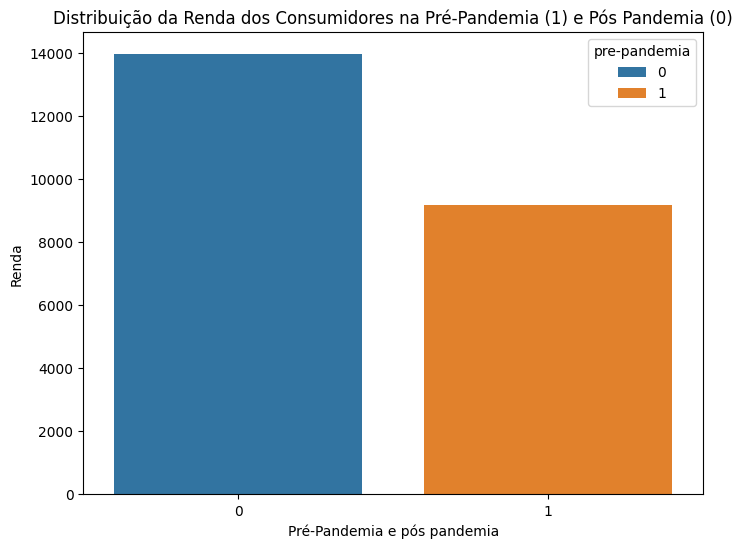

In [ ]:
cores = ["#1f77b4", "#ff7f0e"]

# Filtrar as pessoas da pré-pandemia
pre_pandemia = consumidor_df[consumidor_df['pre-pandemia'] == 1]
# Calcular a renda total da pré-pandemia
renda_total_pre_pandemia = pre_pandemia['renda'].sum()

# Filtrar as pessoas da pós-pandemia
pos_pandemia = consumidor_df[consumidor_df['pre-pandemia'] == 0]
# Calcular a renda total da pós-pandemia
renda_total_pos_pandemia = pos_pandemia['renda'].sum()


print("Renda total na pré-pandemia:", renda_total_pre_pandemia)
print("Renda total na pós-pandemia:", renda_total_pos_pandemia)


# Filtrando os consumidores pré-pandemia
plt.figure(figsize=(8, 6))
sns.barplot(x='pre-pandemia', y='renda', data=consumidor_df, palette=cores, hue='pre-pandemia', dodge=False, errorbar=None)
plt.xlabel('Pré-Pandemia e pós pandemia')
plt.ylabel('Renda')
plt.title('Distribuição da Renda dos Consumidores na Pré-Pandemia (1) e Pós Pandemia (0)')
plt.show()



### Análise

Comparando os totais de renda, podemos observar que a renda total na pós-pandemia é maior do que na pré-pandemia.
Isso sugere que, em média, os consumidores podem ter experimentado um aumento geral de renda após o período da pandemia.
Agora, em relação ao gráfico de barras:

O gráfico mostra a distribuição da renda dos consumidores na pré-pandemia (representada pela cor azul) e na pós-pandemia (representada pela cor laranja).
Cada barra no gráfico representa a média da renda dos consumidores em cada período.
A partir do gráfico, podemos visualizar como a distribuição da renda mudou entre os dois períodos.


2. Você notou diferenças nítidas pré e pós pandemia? Como você poderia
provar estatisticamente que essas diferenças são significativas ? (pergunta
extra)


3. Suponha agora que os dados recebidos são somente uma amostra da sua
população total de clientes. Suponha que a sua "população" de clientes
verdadeira é de 100000. Qual o tamanho da amostra necessária para
chegarmos a conclusões com 95% de confiança e 2% de margem de erro? A
base informada é suficiente? E com uma margem de erro de 10%?

HISTOGRAMA

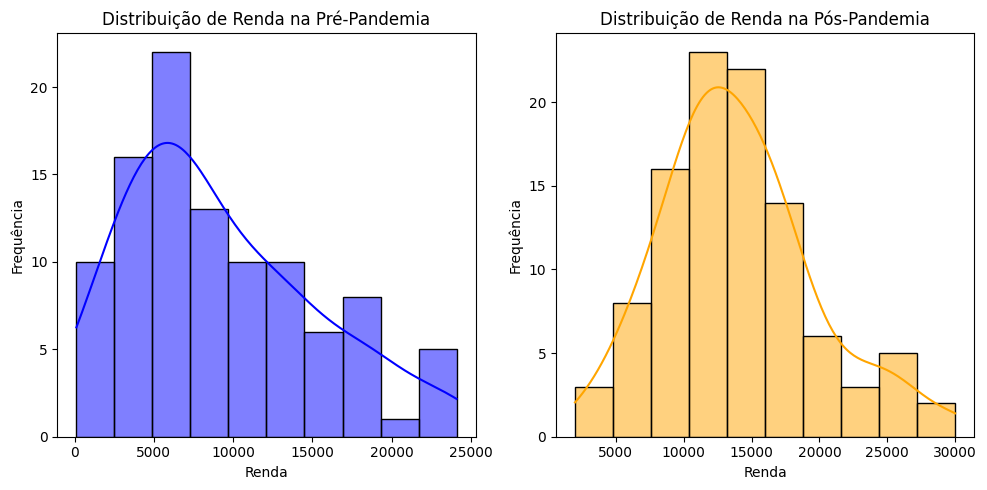

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotar histogramas de renda para cada período
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.histplot(pre_pandemia['renda'], bins=10, color='blue', kde=True)
plt.title('Distribuição de Renda na Pré-Pandemia')
plt.xlabel('Renda')
plt.ylabel('Frequência')

plt.subplot(1, 2, 2)
sns.histplot(pos_pandemia['renda'], bins=10, color='orange', kde=True)
plt.title('Distribuição de Renda na Pós-Pandemia')
plt.xlabel('Renda')
plt.ylabel('Frequência')

plt.tight_layout()
plt.show()
